<a href="https://colab.research.google.com/github/acedesci/scanalytics/blob/master/S7_Demo2_Titanic-SCMP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 7: Introduction to ML - Classification

## Demo 2: Classification on Toy Dataset 2 (Titanic)

Classification using the Dataset from Kaggle (https://www.kaggle.com/c/titanic/data). The data file is provided to you and please put the folder "data_titanic" in the same folder as this jupyter notebook.

In [1]:
import sklearn
from sklearn import *
sklearn.__version__

'0.22.2.post1'

In [2]:
import pandas #we also need pandas package here to load the csv data

# Load dataset
url = 'https://raw.githubusercontent.com/acedesci/scanalytics/master/S7_intro_ML/data/titanic_train.csv'
data = titanic_data = pandas.read_csv(url)
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
le_gender = sklearn.preprocessing.LabelEncoder()
data['binary_gender'] = le_gender.fit_transform(titanic_data['Sex'].values)
selected_features = ['Pclass','Age', 'SibSp', 'Parch', 'Fare','binary_gender']
X = data[selected_features].fillna(0)
y = data['Survived'].values
X.head(5)

,Pclass,Age,SibSp,Parch,Fare,binary_gender
0,3,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,0
2,3,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,0
4,3,35.0,0,0,8.0500,1


In [0]:
# Split into training and testing data (72/25 by default)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=0)

### 1. Logistic regression model

In [5]:
# Run Logistic regression
logreg = sklearn.linear_model.LogisticRegression().fit(X_train, y_train)

# Print the results
print("Logistic Regression: Training accuracy: {:.3f}".format(logreg.score(X_train, y_train)))
print("Logistic Regression: Testing accuracy: {:.3f}".format(logreg.score(X_test, y_test)))

print("intercept"+str(logreg.intercept_))
print("coefficients:"+str(logreg.coef_[0]))

Logistic Regression: Training accuracy: 0.786
Logistic Regression: Testing accuracy: 0.789
intercept[3.6014611]
coefficients:[-8.81843532e-01 -1.61649210e-02 -3.15996641e-01  5.95201903e-04
  2.28530766e-03 -2.59412757e+00]


### 2. Decision tree model

In [6]:
# Run decision tree
# tree = sklearn.tree.DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
tree = sklearn.ensemble.RandomForestClassifier(random_state=0).fit(X_train, y_train)
print("Decision Tree: Training accuracy: {:.3f}".format(tree.score(X_train, y_train)))
print("Decision Tree: Testing accuracy: {:.3f}".format(tree.score(X_test, y_test)))

Decision Tree: Training accuracy: 0.981
Decision Tree: Testing accuracy: 0.825


#### 2.1 Explore feature importance and tree

In [7]:
print(selected_features)
print(tree.feature_importances_)

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'binary_gender']
[0.08589318 0.26133804 0.05138062 0.0471371  0.29112239 0.26312867]


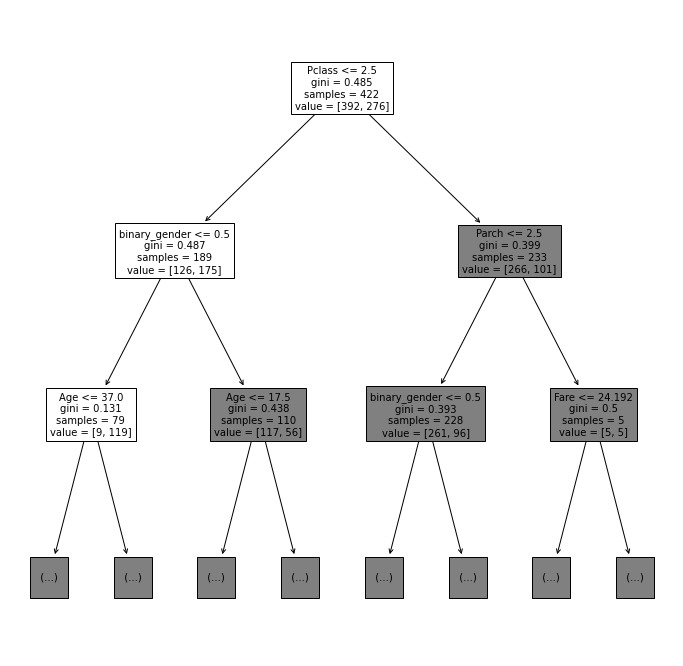

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
sklearn.tree.plot_tree(tree.estimators_[0], feature_names=selected_features, fontsize=10, max_depth=2)
plt.show()

#### 2.2 Performing prediction from the trained (fitted) model

In [9]:
#Note: input features = ['Pclass','Age', 'SibSp', 'Parch', 'Fare','binary_gender']
jack = [3., 19., 0., 0., 5.0, 1.0]
rose = [1., 17., 1., 2., 100.0, 0.0]

print([jack,rose])

# Predict surviving chances
survivor_predictions = tree.predict([jack, rose])
print("Jack Survival Rate:", survivor_predictions[0])
print("Rose Survival Rate:", survivor_predictions[1])

[[3.0, 19.0, 0.0, 0.0, 5.0, 1.0], [1.0, 17.0, 1.0, 2.0, 100.0, 0.0]]
Jack Survival Rate: 0
Rose Survival Rate: 1


### 3. Evaluation - calculate precision and recall

Calculate precision and recall for the model recently fitted (either logistic regression or decision tree)

In [10]:
# calculate precision and recall

y_predict = logreg.predict(X_test) #use this for logistic regression 
# y_predict = tree.predict(X_test) #use this for decision tree

print("Precision score: {:.3f}".format(sklearn.metrics.precision_score(y_test, y_predict)))
print("Recall score: {:.3f}".format(sklearn.metrics.recall_score(y_test, y_predict)))

Precision score: 0.718
Recall score: 0.726


Here are the codes to plot precision-recall curve (see https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py)

Here I have put both the logistic regression or decision tree. However, the precision-recall curve is generally used for the threshold analysis of logistic regression.

Text(0.5, 1.0, 'Average precision score: AP=0.84')

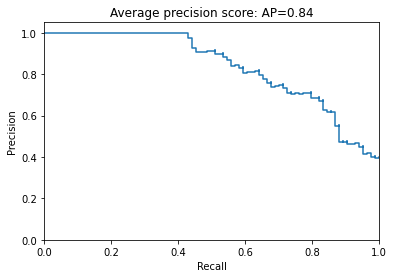

In [11]:
import matplotlib.pyplot as plt

y_prob = logreg.decision_function(X_test) #use this for logistic regression
# y_prob = tree.predict_proba(X_test)[:,1]  #use this for decision tree

precision, recall, thresholds = sklearn.metrics.precision_recall_curve(y_test, y_prob)

plt.figure()
plt.step(recall, precision)
average_precision = sklearn.metrics.average_precision_score(y_test, y_prob)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score: AP={0:0.2f}'.format(average_precision))